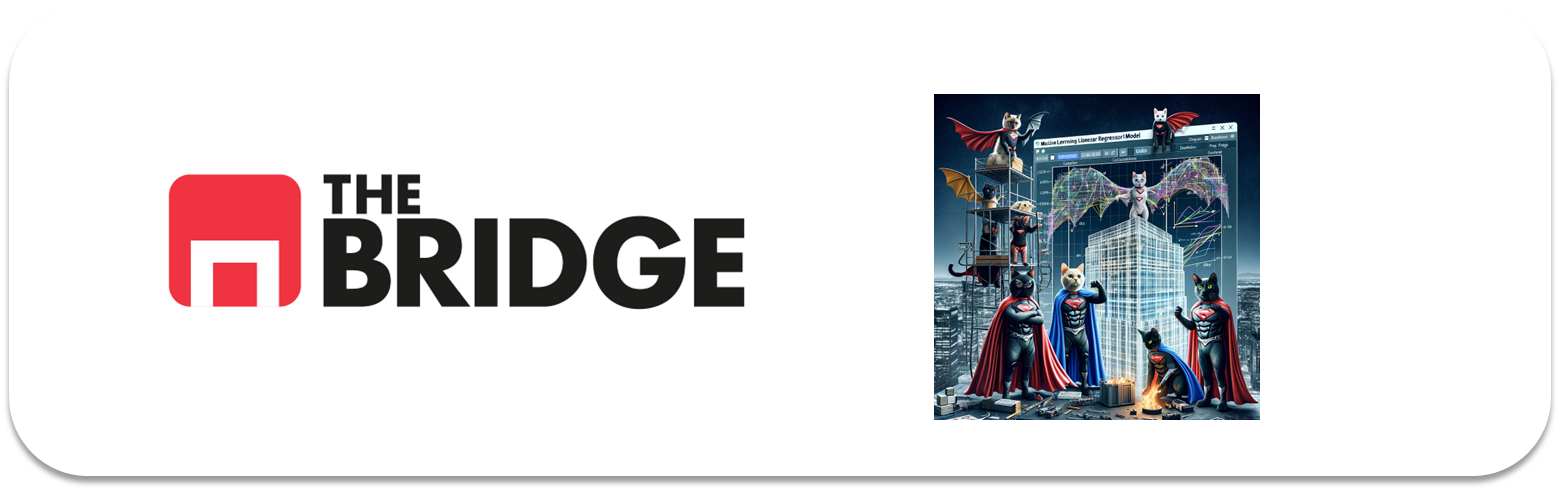

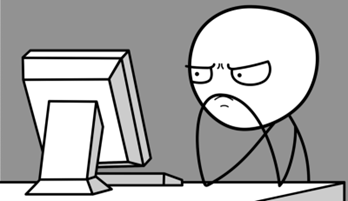

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [89]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


En este conjunto de ejercicios crearás un modelo para resolver un ***problema multiclase o multicategórico de clasificación***, en concreto de ***clasificación de flores*** en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [90]:
from sklearn.datasets import load_iris #importar función para cargar el dataset de diabetes

# Cargar el dataset de diabetes
data = load_iris()

In [91]:
# Mostrar todos los datos de forma general. 
print("\nDatos generales del dataset de iris:")
print(data)


Datos generales del dataset de iris:
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.

In [92]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [93]:
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'],columns=['target'])

In [94]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
y.value_counts(normalize=True)*100

target
0         33.333333
1         33.333333
2         33.333333
Name: proportion, dtype: float64

* Clases del Target:
    * 0 = Iris-Setosa
    * 1 = Iris-Versicolour
    * 2 = Iris-Virginica


In [96]:
features = x.columns.to_list()
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [97]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

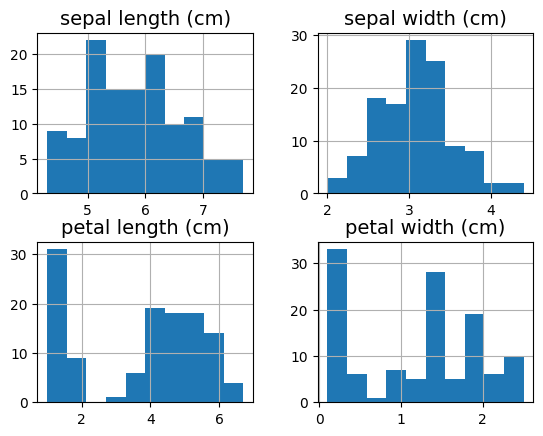

In [98]:
X_train.hist()
plt.show()

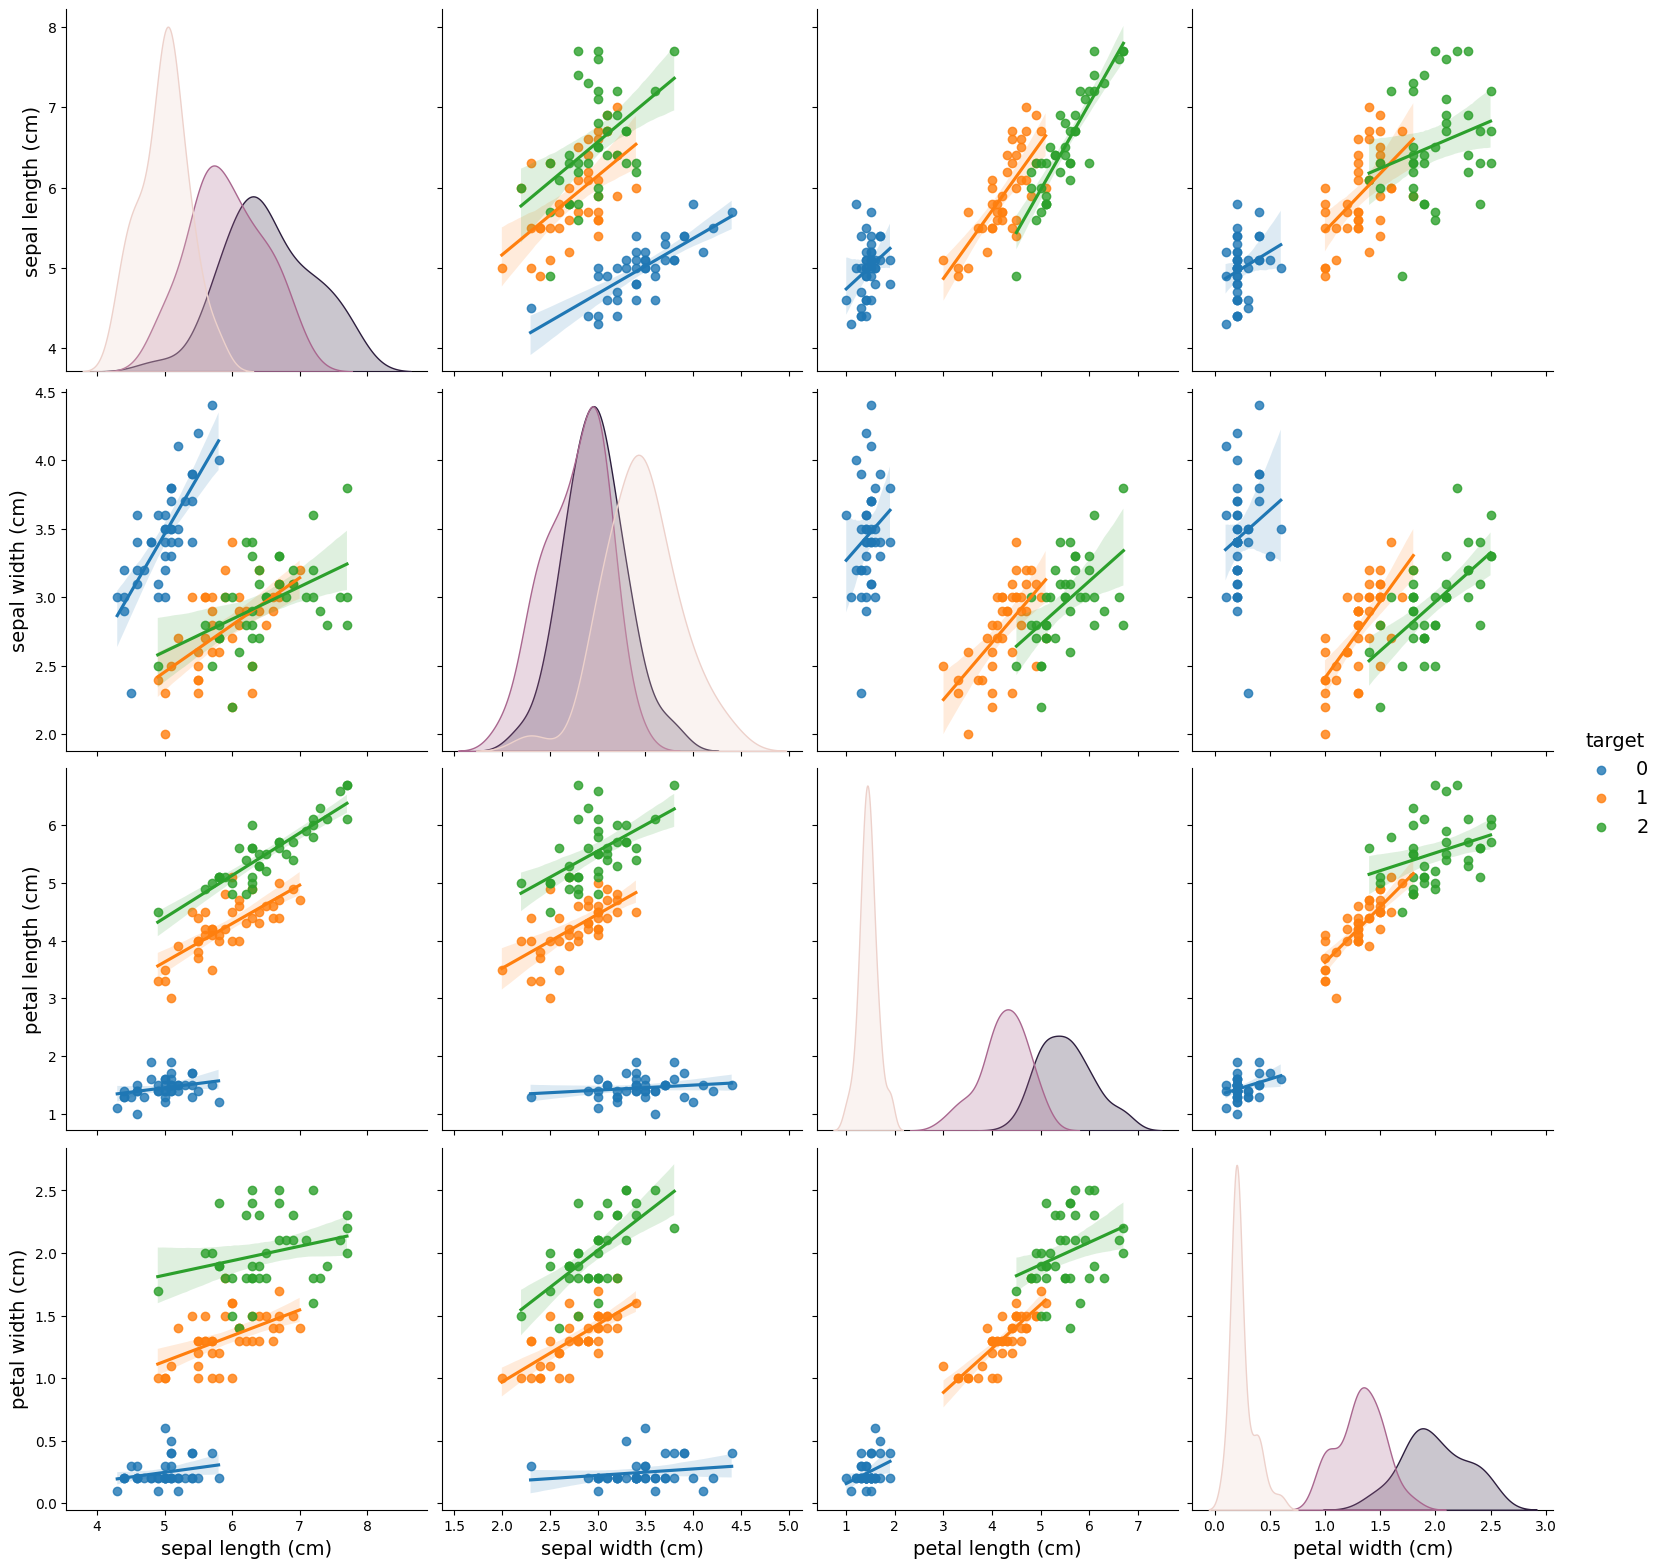

In [99]:
train_data = pd.concat([X_train,y_train],axis=1)

sns.pairplot(train_data,
            hue='target',
            height=4,
            vars=["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)"],
            kind='reg'); # "reg" de regresión lineal

In [ ]:
# Escalado

std_scaler = StandardScaler()
std_scaler.fit(X_train[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)

X_train = pd.DataFrame(std_scaler.transform(X_train[features]), columns = features)
X_test = pd.DataFrame(std_scaler.transform(X_test[features]), columns= features)

X_train.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.754152e-15,-1.694940e-15,-2.294461e-16,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [86]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



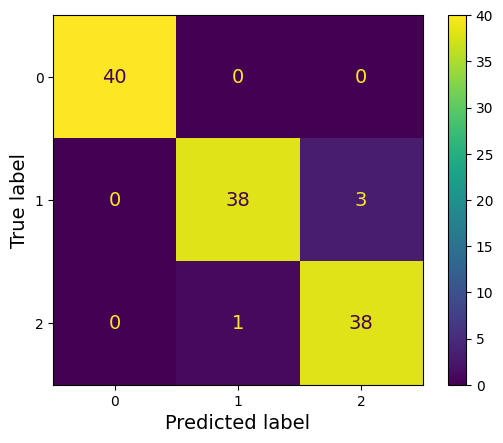

In [ ]:
y_pred = log_reg.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
print(classification_report(y_train, y_pred))

### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [103]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218
5,-0.498762,0.756479,-1.276006,-1.045633
6,-0.254968,-0.361470,-0.072587,0.155733
7,1.329692,0.085709,0.786998,1.490583
8,0.476414,-1.926598,0.443164,0.422703
9,-0.011174,-0.808649,0.099330,0.022248


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



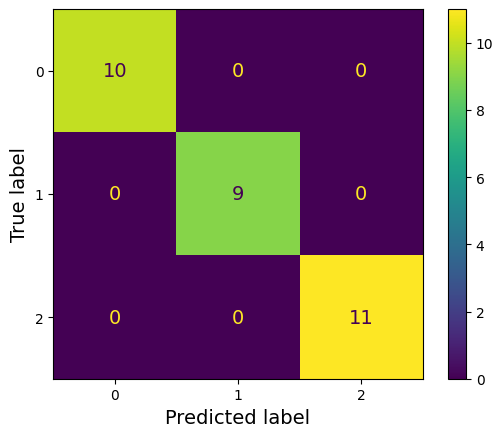

In [72]:
y_pred_test = log_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [ ]:
log_reg.coef_

array([[-1.00316587,  1.14487318, -1.8113482 , -1.69251025],
       [ 0.52799044, -0.28319987, -0.34060665, -0.72013959],
       [ 0.47517543, -0.86167331,  2.15195485,  2.41264984]])

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

,coefs
sepal length (cm),-1.003166
sepal width (cm),1.144873
petal length (cm),-1.811348
petal width (cm),-1.692510


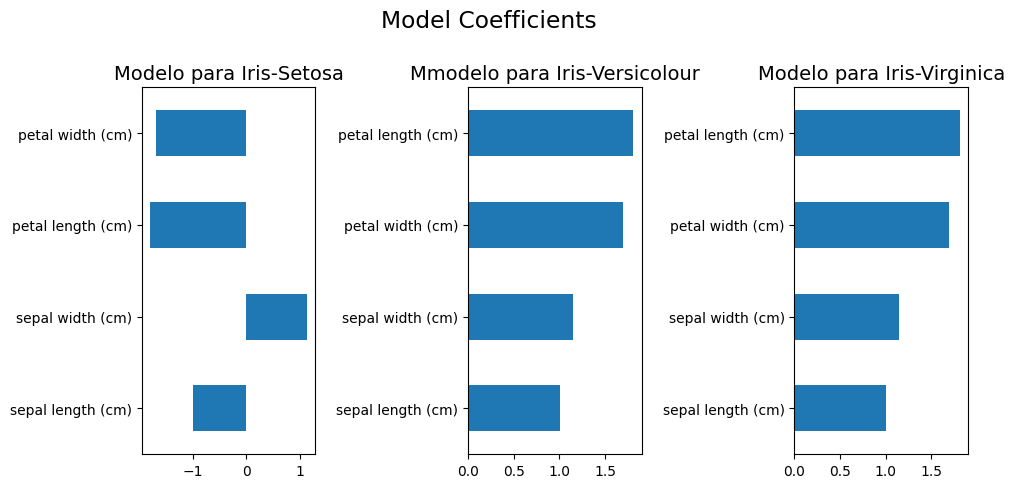

In [118]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1,3, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    ax[0].set_title("Modelo para Iris-Setosa")
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    ax[1].set_title("Mmodelo para Iris-Versicolour")
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[2], legend=False)
    ax[2].set_title("Modelo para Iris-Virginica")
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef


show_coefs(log_reg)